In [ ]:
import h5py
import torch
import pickle

In [ ]:
!wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWordVectors.csd"

--2020-08-22 09:02:47--  http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWordVectors.csd
Resolving immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)... 128.2.211.216
Connecting to immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)|128.2.211.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64914049 (62M) [audio/csound]
Saving to: ‘CMU_MOSI_TimestampedWordVectors.csd’

CMU_MOSI_Timestampe 100%[===================>]  61.91M  18.1MB/s    in 3.8s    

2020-08-22 09:02:51 (16.3 MB/s) - ‘CMU_MOSI_TimestampedWordVectors.csd’ saved [64914049/64914049]



In [ ]:
data = h5py.File('CMU_MOSI_TimestampedWordVectors.csd', 'r')

In [ ]:
data['glove_vectors']['data']['yvsjCA6Y5Fc']['features'].shape

(616, 300)

In [ ]:
!wget "http://immortal.multicomp.cs.cmu.edu/raw_datasets/processed_data/cmu-mosi/seq_length_50/mosi_data_noalign.pkl"

--2020-08-22 09:18:33--  http://immortal.multicomp.cs.cmu.edu/raw_datasets/processed_data/cmu-mosi/seq_length_50/mosi_data_noalign.pkl
Resolving immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)... 128.2.211.216
Connecting to immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)|128.2.211.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 340956297 (325M)
Saving to: ‘mosi_data_noalign.pkl’

mosi_data_noalign.p 100%[===================>] 325.16M  17.9MB/s    in 19s     

2020-08-22 09:18:52 (17.5 MB/s) - ‘mosi_data_noalign.pkl’ saved [340956297/340956297]



In [ ]:
data  = pickle.load( open( "mosi_data_noalign.pkl", "rb" ) )

In [ ]:
data.keys()

dict_keys(['train', 'valid', 'test'])

In [ ]:
data['train'].keys()

dict_keys(['id', 'labels', 'vision', 'text', 'audio'])

In [ ]:
data['train']['audio'].shape

(1284, 375, 5)

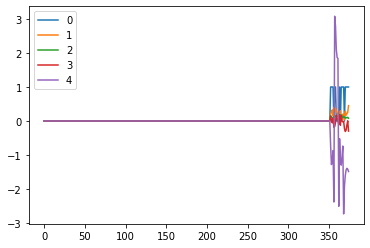

In [ ]:
import pandas as pd

df_data = pd.DataFrame(data['train']['audio'][20])
df_data.plot()

In [18]:
!pip install h5py validators tqdm numpy argparse requests colorama -q
# !git clone https://github.com/A2Zadeh/CMU-MultimodalSDK
import sys
sys.path.insert(0, "/content/CMU-MultimodalSDK/")

In [20]:
DATA_PATH = './csd'
import mmsdk
from mmsdk import mmdatasdk
import os
import re
import numpy as np
from mmsdk import mmdatasdk as md

In [ ]:
!wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_openSMILE_IS09.csd"
!wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/labels/CMU_MOSI_Opinion_Labels.csd"
!wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_42.csd"
!wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWords.csd"
!wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_COVAREP.csd"
!wget "http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedPhones.csd"

--2020-08-22 09:38:07--  http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_openSMILE_IS09.csd
Resolving immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)... 128.2.211.216
Connecting to immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)|128.2.211.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447995312 (427M) [audio/csound]
Saving to: ‘CMU_MOSI_openSMILE_IS09.csd’

CMU_MOSI_openSMILE_ 100%[===================>] 427.24M  17.6MB/s    in 25s     

2020-08-22 09:38:32 (17.4 MB/s) - ‘CMU_MOSI_openSMILE_IS09.csd’ saved [447995312/447995312]

--2020-08-22 09:38:33--  http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/labels/CMU_MOSI_Opinion_Labels.csd
Resolving immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)... 128.2.211.216
Connecting to immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)|128.2.211.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674712 (659K) [audio/csound]
Savin

In [21]:
DATA_PATH = './csd/'
data_files = os.listdir(DATA_PATH)
recipe = {feat.split('.csd')[0]: os.path.join(DATA_PATH, feat) for feat in data_files}
recipe.pop('.ipynb_checkpoints', None)
recipe.pop('CMU_MOSI_Opinion_Labels', None)
recipe.pop('CMU_MOSI_OpenSmile_EB10', None)
print('\n'.join(recipe))

CMU_MOSI_TimestampedPhones
CMU_MOSI_COVAREP
CMU_MOSI_openSMILE_IS09
CMU_MOSI_Visual_Facet_42


In [22]:
# !mv ./*.csd ./csd/

In [23]:
recipe 

{'CMU_MOSI_COVAREP': './csd/CMU_MOSI_COVAREP.csd',
 'CMU_MOSI_TimestampedPhones': './csd/CMU_MOSI_TimestampedPhones.csd',
 'CMU_MOSI_Visual_Facet_42': './csd/CMU_MOSI_Visual_Facet_42.csd',
 'CMU_MOSI_openSMILE_IS09': './csd/CMU_MOSI_openSMILE_IS09.csd'}

In [29]:
dataset = md.mmdataset(recipe) 



  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s]

                                                                   

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s]

                                                                   

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s]

                                                                   

  0%|          | 0/92 [00:00<?, ? Computational Sequence Entries/s]

                                                                   

[2020-08-22 09:52:36.624] | Success | Computational sequence read from file ./csd/CMU_MOSI_TimestampedPhones.csd ...
[2020-08-22 09:52:36.638] | Status  | Checking the integrity of the <phoneme> computational sequence ...
[2020-08-22 09:52:36.639] | Status  | Checking the format of the data in <phoneme> computational sequence ...
[2020-08-22 09:52:36.675] | Success | <phoneme> computational sequence data in correct format.
[2020-08-22 09:52:36.675] | Status  | Checking the format of the metadata in <phoneme> computational sequence ...
[2020-08-22 09:52:36.675] | Success | <phoneme> computational sequence metadata in correct format.
[2020-08-22 09:52:36.675] | Success | <phoneme> computational sequence is valid!
[2020-08-22 09:52:36.676] | Success | Computational sequence read from file ./csd/CMU_MOSI_COVAREP.csd ...
[2020-08-22 09:52:36.685] | Status  | Checking the integrity of the <COVAREP> computational sequence ...
[2020-08-22 09:52:36.685] | Status  | Checking the format of the da

In [25]:
train_split = md.cmu_mosi.standard_folds.standard_train_fold
valid_split = md.cmu_mosi.standard_folds.standard_valid_fold
test_split = md.cmu_mosi.standard_folds.standard_test_fold

In [26]:
#A simple averaging technique. More advanced methods can be built based on intervals.
def myavg(intervals,features):
    if features.dtype in ['float64', 'float32']:
        return np.mean(features ,axis=0)
    return features

In [27]:
dataset.keys() 

dict_keys(['CMU_MOSI_TimestampedPhones', 'CMU_MOSI_COVAREP', 'CMU_MOSI_openSMILE_IS09', 'CMU_MOSI_Visual_Facet_42'])

In [ ]:
dataset.align('CMU_MOSI_TimestampedPhones',collapse_functions=[myavg]) 

In [31]:
LABEL_PATH = './csd'
data_files = os.listdir(LABEL_PATH)
label_recipe = {feat.split('.csd')[0]: os.path.join(LABEL_PATH, feat) for feat in data_files}
label_recipe.pop('.ipynb_checkpoints', None)
label_recipe.pop('CMU_MOSI_Visual_Facet_42', None)
label_recipe.pop('CMU_MOSI_Visual_Facet_41', None)
label_recipe.pop('CMU_MOSI_COVAREP', None)
label_recipe.pop('CMU_MOSI_openSMILE_IS09', None)
label_recipe.pop('CMU_MOSI_TimestampedPhones', None)
label_recipe.pop('CMU_MOSI_Visual_OpenFace_1', None)
label_recipe.pop('CMU_MOSI_OpenSmile_EB10', None)
label_recipe.pop('CMU_MOSI_Visual_OpenFace_2', None)

print('\n'.join(label_recipe))

CMU_MOSI_Opinion_Labels


In [32]:
dataset.add_computational_sequences(label_recipe, LABEL_PATH) 



  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s]

                                                                   

[2020-08-22 09:53:59.262] | Success | Computational sequence read from file ./csd/CMU_MOSI_Opinion_Labels.csd ...
[2020-08-22 09:53:59.272] | Status  | Checking the integrity of the <Opinion Segment Labels> computational sequence ...
[2020-08-22 09:53:59.272] | Status  | Checking the format of the data in <Opinion Segment Labels> computational sequence ...
[2020-08-22 09:53:59.308] | Success | <Opinion Segment Labels> computational sequence data in correct format.
[2020-08-22 09:53:59.308] | Status  | Checking the format of the metadata in <Opinion Segment Labels> computational sequence ...
[2020-08-22 09:53:59.308] | Success | <Opinion Segment Labels> computational sequence metadata in correct format.
[2020-08-22 09:53:59.308] | Success | <Opinion Segment Labels> computational sequence is valid!


In [33]:
dataset.align('CMU_MOSI_Opinion_Labels')
dataset.hard_unify()

[2020-08-22 09:54:07.464] | Status  | Unify was called ...
[2020-08-22 09:54:07.464] | Warning | c5xsKMxpXnc entry is not shared among all sequences, removing it ...
[2020-08-22 09:54:07.464] | Success | Unify completed ...
[2020-08-22 09:54:07.464] | Status  | Pre-alignment based on <CMU_MOSI_Opinion_Labels> computational sequence started ...
[2020-08-22 09:54:11.597] | Status  | Pre-alignment done for <CMU_MOSI_COVAREP> ...
[2020-08-22 09:54:12.402] | Status  | Pre-alignment done for <CMU_MOSI_Visual_Facet_42> ...
[2020-08-22 09:54:12.615] | Status  | Pre-alignment done for <CMU_MOSI_TimestampedPhones> ...




  0%|          | 0/92 [00:00<?, ? Computational Sequence Entries/s]

Overall Progress:   0%|          | 0/92 [00:00<?, ? Computational Sequence Entries/s]


  0%|          | 0/13 [00:00<?, ? Segments/s]


Aligning 03bSnISJMiM:   0%|          | 0/13 [00:00<?, ? Segments/s]


                                                                   


  0%|          | 0/25 [00:00<?, ? Segments/s]


Aligning 0h-zjBukYpk:   0%|          | 0/25 [00:00<?, ? Segments/s]


                                                                   

Overall Progress:   2%|▏         | 2/92 [00:00<00:05, 15.16 Computational Sequence Entries/s]


  0%|          | 0/14 [00:00<?, ? Segments/s]


Aligning 1DmNV9C1hbY:   0%|          | 0/14 [00:00<?, ? Segments/s]


                                                                   


  0%|          | 0/30 [00:00<?, ? Segments/s]


Aligning 1iG0909rllw:   0%|          | 0/30 [00:00<?, ? Segments/s]

[2020-08-22 09:54:13.078] | Status  | Pre-alignment done for <CMU_MOSI_openSMILE_IS09> ...
[2020-08-22 09:54:13.137] | Status  | Alignment starting ...





                                                                   

Overall Progress:   4%|▍         | 4/92 [00:00<00:05, 15.32 Computational Sequence Entries/s]


  0%|          | 0/63 [00:00<?, ? Segments/s]


Aligning 2WGyTLYerpo:   0%|          | 0/63 [00:00<?, ? Segments/s]


Aligning 2WGyTLYerpo:  56%|█████▌    | 35/63 [00:00<00:00, 346.74 Segments/s]


                                                                             

Overall Progress:   5%|▌         | 5/92 [00:00<00:08,  9.98 Computational Sequence Entries/s]


  0%|          | 0/30 [00:00<?, ? Segments/s]


Aligning 2iD-tVS8NPw:   0%|          | 0/30 [00:00<?, ? Segments/s]


                                                                   


  0%|          | 0/24 [00:00<?, ? Segments/s]


Aligning 5W7Z1C_fDaE:   0%|          | 0/24 [00:00<?, ? Segments/s]


                                                                   

Overall Progress:   8%|▊         | 7/92 [00:00<00:07, 10.74 Computational Sequence E

[2020-08-22 09:54:20.288] | Success | Alignment to <CMU_MOSI_Opinion_Labels> complete.
[2020-08-22 09:54:20.289] | Status  | Replacing dataset content with aligned computational sequences
[2020-08-22 09:54:20.290] | Success | Initialized empty <CMU_MOSI_TimestampedPhones> computational sequence.
[2020-08-22 09:54:20.290] | Status  | Checking the format of the data in <CMU_MOSI_TimestampedPhones> computational sequence ...
[2020-08-22 09:54:20.303] | Success | <CMU_MOSI_TimestampedPhones> computational sequence data in correct format.
[2020-08-22 09:54:20.303] | Status  | Checking the format of the metadata in <CMU_MOSI_TimestampedPhones> computational sequence ...
[2020-08-22 09:54:20.304] | Success | <CMU_MOSI_TimestampedPhones> computational sequence metadata in correct format.
[2020-08-22 09:54:20.304] | Success | Initialized empty <CMU_MOSI_COVAREP> computational sequence.
[2020-08-22 09:54:20.304] | Status  | Checking the format of the data in <CMU_MOSI_COVAREP> computational sequ

In [45]:
text_aligned_tensors = dataset.get_tensors(seq_len=50,non_sequences=["CMU_MOSI_Opinion_Labels"],direction=False,folds=[train_split,valid_split,test_split])

[2020-08-22 09:57:33.663] | Status  | Hard unify was called ...
[2020-08-22 09:57:33.668] | Success | Hard unify completed ...


In [35]:
aligned_tensors[0].keys()

dict_keys(['CMU_MOSI_TimestampedPhones', 'CMU_MOSI_COVAREP', 'CMU_MOSI_openSMILE_IS09', 'CMU_MOSI_Visual_Facet_42', 'CMU_MOSI_Opinion_Labels'])

In [39]:
import torch

In [53]:
data_covarep = {}
splits = ['train', 'valid', 'test']
for index, split in enumerate(splits):
    data_covarep[split]= torch.tensor(aligned_tensors[index]['CMU_MOSI_COVAREP']).float()
    print(data_covarep[split].shape)

torch.Size([1283, 375, 74])
torch.Size([214, 375, 74])
torch.Size([686, 375, 74])


In [57]:
data_text = {}
splits = ['train', 'valid', 'test']
for index, split in enumerate(splits):
    data_text[split]= text_aligned_tensors[index]['CMU_MOSI_TimestampedPhones']
    print(data_text[split].shape)

(1283, 50, 1)
(214, 50, 1)
(686, 50, 1)


In [55]:
data_opensmile = {}
splits = ['train', 'valid', 'test']
for index, split in enumerate(splits):
    data_opensmile[split]= torch.tensor(aligned_tensors[index]['CMU_MOSI_openSMILE_IS09']).float()
    print(data_opensmile[split].shape)

torch.Size([1283, 375, 384])
torch.Size([214, 375, 384])
torch.Size([686, 375, 384])


In [58]:
data_labels = {}
splits = ['train', 'valid', 'test']
for index, split in enumerate(splits):
    data_labels[split]= torch.tensor(aligned_tensors[index]['CMU_MOSI_Opinion_Labels']).float()
    print(data_labels[split].shape)

torch.Size([1283, 1, 1])
torch.Size([214, 1, 1])
torch.Size([686, 1, 1])


In [59]:
dataset_noalign = {}
splits = ['train', 'valid', 'test']
for split in splits:
    dict_ = {}
    dict_['CMU_MOSI_openSMILE_IS09'] = data_opensmile[split]
    dict_['CMU_MOSI_COVAREP'] = data_covarep[split]
    dict_['CMU_MOSI_TimestampedPhones'] = data_text[split]
    dict_['CMU_MOSI_Opinion_Labels'] = data_labels[split]
    dataset_noalign[split] = dict_

In [60]:
dataset_noalign.keys()

dict_keys(['train', 'valid', 'test'])

In [61]:
dataset_noalign['valid'].keys()

dict_keys(['CMU_MOSI_openSMILE_IS09', 'CMU_MOSI_COVAREP', 'CMU_MOSI_TimestampedPhones', 'CMU_MOSI_Opinion_Labels'])

In [62]:
dataset_noalign['valid']['CMU_MOSI_COVAREP'].shape

torch.Size([214, 375, 74])

In [67]:
torch.save(dataset_noalign, 'mosi_audio_noalign.data')